# Анализ данных комплектаций различных моделей автомобилей и их характеристик.

## Описание данных.    
Признаки:
- brand - марка автомобиля
- model - модель автомобиля 
- complect - комплект
- seats - количество мест
- doors - количество дверей
- engine_type - тип двигателя автомобиля
- engine_power - мощность двигателя
- engine_torque - сила вращения коленчатого вала двигателя
- gearbox_type - тип коробки передач
- drive_type - тип привода автомобиля
- time_tohndrd - время, требуемое автомобилю до достижения скорости в 100 км/ч
- maximum_speed - максимальная скорость автомобиля
- fuel_consumption - (л/100 км) Расход топлива город/трасса/смешанный
- ground_clearance - расстояние от самой нижней точки автомобиля до дороги
- car_dimensions - габариты авто (длина * ширина * высота)
- wheelbase - расстояние между осями передних и задних колес
- trunk capacity - объем багажника
- maximum trunk capacity - максимальный объем багажника 
- fuel_tank_volume - объем топливного бака
- car_weight - масса авто (кг)

Целевой признак:
- type_car - тип автомобиля


In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc

from sklearn.model_selection import GridSearchCV as gscv

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# 1. Подготовка данных
Рассмотрим файл с данными.

In [32]:
data = pd.read_csv("data/data.csv")

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   brand                   1703 non-null   object
 1   model                   1703 non-null   object
 2   complect                1703 non-null   object
 3   type_car                1703 non-null   object
 4   seats                   1703 non-null   int64 
 5   doors                   1703 non-null   int64 
 6   engine_type             1703 non-null   object
 7   engine_power            1703 non-null   object
 8   engine_torque           1703 non-null   object
 9   gearbox_type            1703 non-null   object
 10  drive_type              1703 non-null   object
 11  time_tohndrd            1703 non-null   object
 12  maximum_speed           1703 non-null   object
 13  fuel_consumption        1703 non-null   object
 14  ground_clearance        1703 non-null   object
 15  car_

Пропусков не обнаружено, вероятно, что данные полные.

In [34]:
data.head()

,brand,model,complect,type_car,seats,doors,engine_type,engine_power,engine_torque,gearbox_type,drive_type,time_tohndrd,maximum_speed,fuel_consumption,ground_clearance,car_dimensions,wheelbase,tunk_capacity,maximum_trunk_capacity,fuel_tank_volume,car_weight
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),передний,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),полный,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),передний,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


Изменяем тип значения в колонке fuel_decomposition. Теперь вместо нескольких значений (город, трасса, смешанный) используется только одно - средний расход на всех типах дорог. 

In [35]:
for i in range(len(data["fuel_consumption"])):
    # split the string and then str --> int
    arr = np.array(data["fuel_consumption"][i].split("/")).astype(float)
    data["fuel_consumption"][i] = round(sum(arr.astype(float))/len(arr), 1)

/tmp/ipykernel_614660/2582360457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["fuel_consumption"][i] = round(sum(arr.astype(float))/len(arr), 1)


Разбиваем колонку car_dimensions на 3 колонки car_length, car_width, car_height. Каждая из них может по-отдельности быть полезной в будущем прогнозе типа кузова.

In [36]:
data = data.join(
    data["car_dimensions"].str.split("×", expand=True).rename (
        columns = {0: "car_length", 1: "car_width", 2: "car_height"}
    )
)

# from str to int 
data["car_length"] = pd.to_numeric(data["car_length"])
data["car_width"] = pd.to_numeric(data["car_width"])
data["car_heigth"] = pd.to_numeric(data["car_height"])
del data["car_dimensions"] #don't need it anymore 

Удаляем колонки complect и model, они не несут информации, которая могла бы быть полезной для решения задачи.

In [37]:
del data["complect"]
del data["model"]

Разбиваем данные из колонки "engine_type" на "engine_type" и "engine_volume". Затем по тому же приниципу разбиваем данные из колонки "gearbox_type" на "gearbox_type" и "speed_transmission_num". 

In [38]:
temp = []
for i in range(len(data["engine_type"])):
    temp += [int(s) for s in re.findall(r'\b\d+\b', data["engine_type"][i])]
    data["engine_type"][i] = re.findall(r'[А-я]+', data["engine_type"][i])[0]
data["engine_volume"] = temp

temp = []
for i in range(len(data["gearbox_type"])):
    temp += [int(s) for s in re.findall(r'\b\d+\b', data["gearbox_type"][i])]
    data["gearbox_type"][i] = re.findall(r'[А-я]+', data["gearbox_type"][i])[0]
data["speed_transmission_num"] = temp

/tmp/ipykernel_614660/403078951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["engine_type"][i] = re.findall(r'[А-я]+', data["engine_type"][i])[0]
/tmp/ipykernel_614660/403078951.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gearbox_type"][i] = re.findall(r'[А-я]+', data["gearbox_type"][i])[0]


In [39]:
data.head()

,brand,type_car,seats,doors,engine_type,engine_power,engine_torque,gearbox_type,drive_type,time_tohndrd,maximum_speed,fuel_consumption,ground_clearance,wheelbase,tunk_capacity,maximum_trunk_capacity,fuel_tank_volume,car_weight,car_length,car_width,car_height,car_heigth,engine_volume,speed_transmission_num
0,Audi,Седан класса C,5,4,бензиновый,150 л. с.,250 Н·м,роботизированная,передний,8.2 секунды,224 км/ч,4.9,165 мм,2637 мм,425 л,880 л,50 л,1320 кг,4458,1796,1416,1416,1395,7
1,Audi,Седан класса C,5,4,бензиновый,150 л. с.,250 Н·м,роботизированная,передний,8.2 секунды,224 км/ч,4.9,165 мм,2637 мм,425 л,880 л,50 л,1320 кг,4458,1796,1416,1416,1395,7
2,Audi,Седан класса C,5,4,бензиновый,190 л. с.,320 Н·м,роботизированная,передний,6.8 секунды,250 км/ч,5.8,165 мм,2637 мм,425 л,880 л,50 л,1395 кг,4458,1796,1416,1416,1984,7
3,Audi,Седан класса C,5,4,бензиновый,190 л. с.,320 Н·м,роботизированная,полный,6.2 секунды,242 км/ч,5.9,165 мм,2637 мм,390 л,845 л,55 л,1465 кг,4458,1796,1416,1416,1984,7
4,Audi,Седан класса C,5,4,бензиновый,190 л. с.,320 Н·м,роботизированная,передний,6.8 секунды,242 км/ч,5.8,165 мм,2637 мм,425 л,880 л,50 л,1395 кг,4458,1796,1416,1416,1984,7


Теперь необходимо очистить данные об измерительных единицах из колонок, оставив только числа.

In [40]:
def split_int(df): 
    for i in range(len(df)):
        df[i] = [int(s) for s in re.findall(r'\b\d+\b', df[i])][0]
    return df

def split_float(df):
    for i in range(len(df)):
        if df[i] == "нет данных":
            # don't wanna have to deal with it, really don't have time for that, plese ignore this KOSTYLE.
            # anyway, there is high probability that you'll not notice that, because when I checked the test tasks 
            # of candidates at my last job, I was just quickly scrolling the code and trying to get the main idea
            df[i] = df[0]
        else:
            df[i] = [float(s) for s in re.findall(r'\d+(?:\.\d+)?', df[i])][0]
    return df

int_to_prepoc = ["engine_power", "engine_torque", "maximum_speed", "ground_clearance", "wheelbase", "tunk_capacity", "maximum_trunk_capacity",
                "fuel_tank_volume", "car_weight"]

float_to_preproc = ["time_tohndrd"]

for column_name in int_to_prepoc:
    data[column_name] = split_int(data[column_name])

for column_name in float_to_preproc:
    data[column_name] = split_float(data[column_name])

/tmp/ipykernel_614660/3904425633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = [int(s) for s in re.findall(r'\b\d+\b', df[i])][0]
/tmp/ipykernel_614660/3904425633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = [float(s) for s in re.findall(r'\d+(?:\.\d+)?', df[i])][0]
/tmp/ipykernel_614660/3904425633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[0]


In [41]:
numerical = ["engine_torque", "time_tohndrd", "engine_power", "maximum_speed", "fuel_consumption", "ground_clearance", "wheelbase",
        "tunk_capacity", "maximum_trunk_capacity", "fuel_tank_volume", "car_weight", "car_length",
        "car_width", "engine_volume", "speed_transmission_num"]

for column in numerical:
    data[column] = pd.to_numeric(data[column])

In [42]:
pd.set_option('display.max_columns', None)
del data["car_height"]
data.head()

,brand,type_car,seats,doors,engine_type,engine_power,engine_torque,gearbox_type,drive_type,time_tohndrd,maximum_speed,fuel_consumption,ground_clearance,wheelbase,tunk_capacity,maximum_trunk_capacity,fuel_tank_volume,car_weight,car_length,car_width,car_heigth,engine_volume,speed_transmission_num
0,Audi,Седан класса C,5,4,бензиновый,150,250,роботизированная,передний,8.2,224,4.9,165,2637,425,880,50,1320,4458,1796,1416,1395,7
1,Audi,Седан класса C,5,4,бензиновый,150,250,роботизированная,передний,8.2,224,4.9,165,2637,425,880,50,1320,4458,1796,1416,1395,7
2,Audi,Седан класса C,5,4,бензиновый,190,320,роботизированная,передний,6.8,250,5.8,165,2637,425,880,50,1395,4458,1796,1416,1984,7
3,Audi,Седан класса C,5,4,бензиновый,190,320,роботизированная,полный,6.2,242,5.9,165,2637,390,845,55,1465,4458,1796,1416,1984,7
4,Audi,Седан класса C,5,4,бензиновый,190,320,роботизированная,передний,6.8,242,5.8,165,2637,425,880,50,1395,4458,1796,1416,1984,7


In [43]:
def categorize(df):
    to_categorize = ["хэтчбек", "седан", "пикап", "вэн", "купе", "универсал", "внедорожник", "кроссовер", "кабриолет", "родстер"]
    for i in range(len(df)):
        for category in to_categorize:
            if category in df[i].lower():
                df[i] = category
            else:
                continue
    return df

data["type_car"] = categorize(data["type_car"])  

/tmp/ipykernel_614660/422714364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = category


In [44]:
data.head()

,brand,type_car,seats,doors,engine_type,engine_power,engine_torque,gearbox_type,drive_type,time_tohndrd,maximum_speed,fuel_consumption,ground_clearance,wheelbase,tunk_capacity,maximum_trunk_capacity,fuel_tank_volume,car_weight,car_length,car_width,car_heigth,engine_volume,speed_transmission_num
0,Audi,седан,5,4,бензиновый,150,250,роботизированная,передний,8.2,224,4.9,165,2637,425,880,50,1320,4458,1796,1416,1395,7
1,Audi,седан,5,4,бензиновый,150,250,роботизированная,передний,8.2,224,4.9,165,2637,425,880,50,1320,4458,1796,1416,1395,7
2,Audi,седан,5,4,бензиновый,190,320,роботизированная,передний,6.8,250,5.8,165,2637,425,880,50,1395,4458,1796,1416,1984,7
3,Audi,седан,5,4,бензиновый,190,320,роботизированная,полный,6.2,242,5.9,165,2637,390,845,55,1465,4458,1796,1416,1984,7
4,Audi,седан,5,4,бензиновый,190,320,роботизированная,передний,6.8,242,5.8,165,2637,425,880,50,1395,4458,1796,1416,1984,7


Посмотрим на графики:

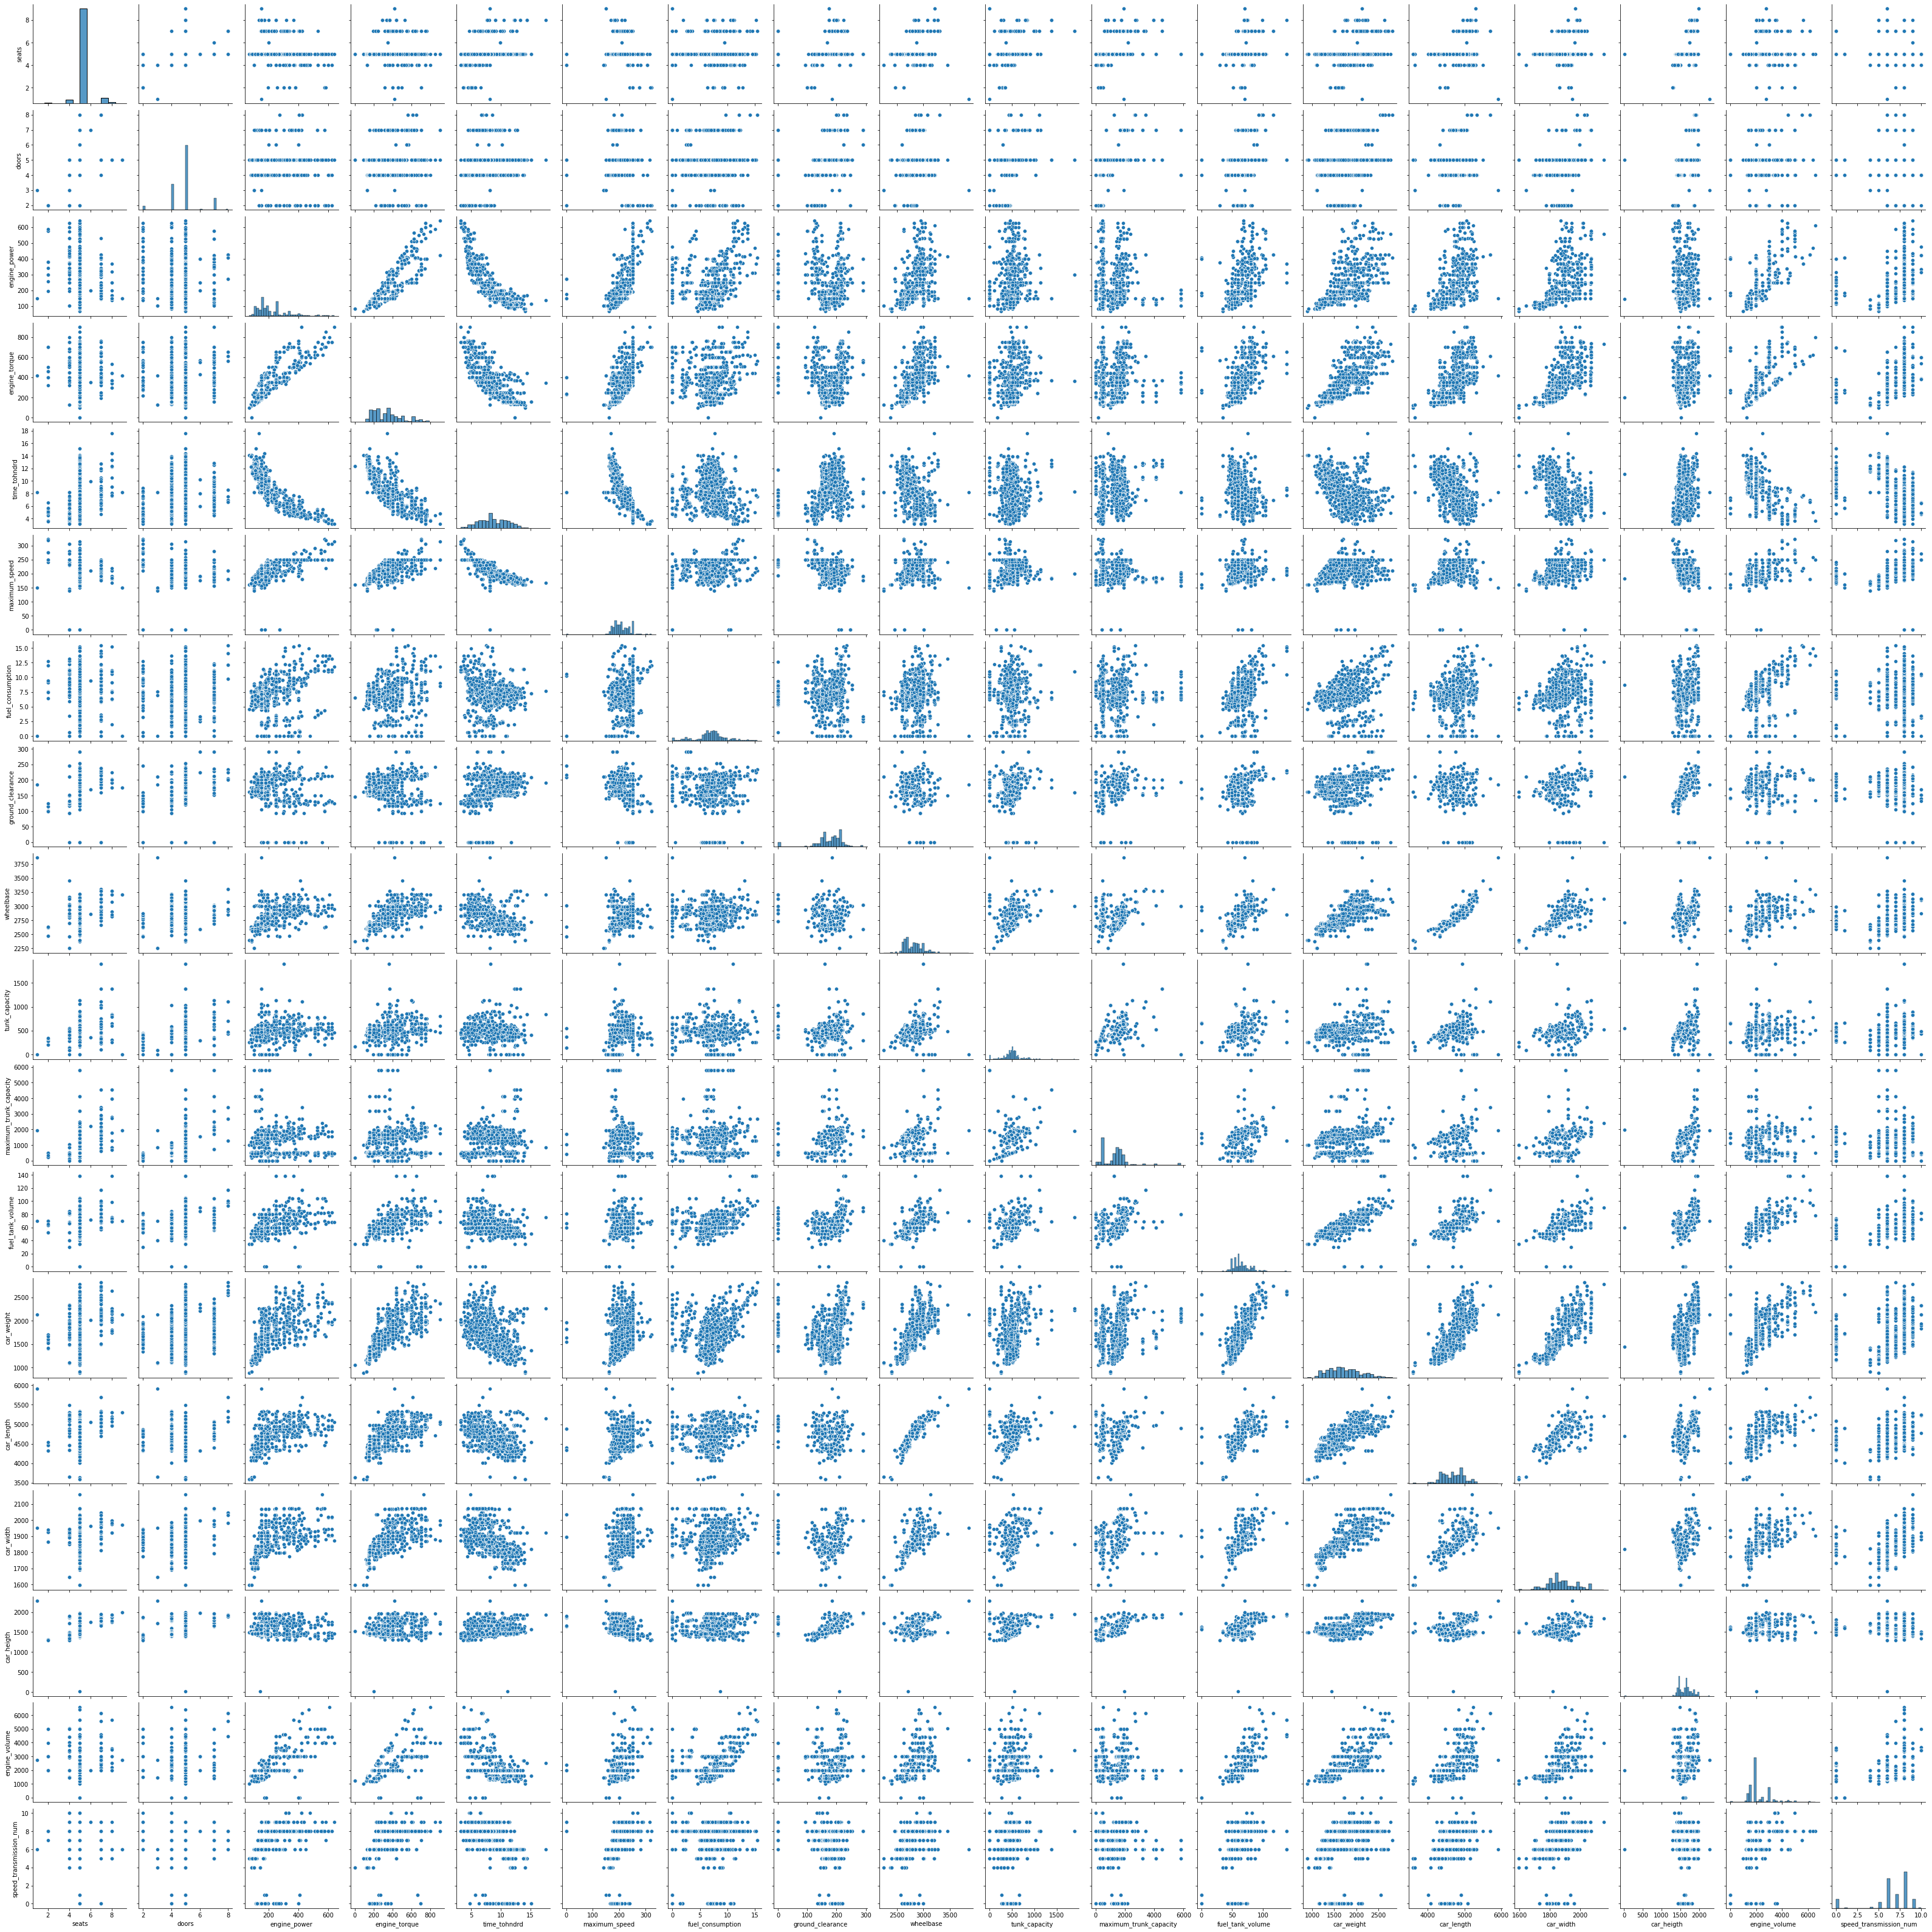

In [45]:
sns.pairplot(data)

In [46]:
correlations = data.drop(['brand', 'type_car', 'engine_type', 'gearbox_type', 'drive_type'], axis=1)
for i in correlations:
    for j in correlations:
        if j != i:
            corr = correlations[i].corr(correlations[j])
            if corr > 0.2:
                print(f'{i} коррелирует с {j} = {correlations[i].corr(correlations[j])}')

seats коррелирует с doors = 0.259359167623727
seats коррелирует с wheelbase = 0.2500984603156501
seats коррелирует с maximum_trunk_capacity = 0.25067770987988164
seats коррелирует с car_weight = 0.2414360167086901
seats коррелирует с car_length = 0.23282337794170438
seats коррелирует с car_heigth = 0.38208948953268485
doors коррелирует с seats = 0.25935916762372696
doors коррелирует с ground_clearance = 0.38027604975506213
doors коррелирует с tunk_capacity = 0.2775203093638185
doors коррелирует с maximum_trunk_capacity = 0.6310722232463166
doors коррелирует с fuel_tank_volume = 0.22635074287274126
doors коррелирует с car_weight = 0.26836255025133615
doors коррелирует с car_width = 0.2729672736856775
doors коррелирует с car_heigth = 0.599090445658855
engine_power коррелирует с engine_torque = 0.8384990459544118
engine_power коррелирует с maximum_speed = 0.6232607265705675
engine_power коррелирует с fuel_consumption = 0.2398020522702469
engine_power коррелирует с wheelbase = 0.5185796539

Коррелиция у признаков преимущественно слабая.

Подготовим модель с использованием прямого кодирования (OneHotEncoder для логистической регрессии) и порядкового кодирования (OrdinalEncoder для деревьев). В нашей выборке есть 5 категориальных признаков:

In [47]:
data["brand"].unique()

array(['Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Citroen', 'Genesis',
       'Infiniti', 'Hyundai', 'Honda', 'Jaguar', 'Jeep', 'KIA',
       'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [48]:
data["type_car"].unique()

array(['седан', 'хэтчбек', 'универсал', 'купе', 'кроссовер', 'кабриолет',
       'родстер', 'внедорожник', 'вэн', 'пикап'], dtype=object)

In [49]:
data["engine_type"].unique()

array(['бензиновый', 'дизельный', 'электрический', 'гибридный'],
      dtype=object)

In [50]:
data["gearbox_type"].unique()

array(['роботизированная', 'автоматическая', 'механическая', 'вариатор'],
      dtype=object)

In [51]:
data["drive_type"].unique()

array(['передний', 'полный', 'задний'], dtype=object)

In [52]:
def encoder(column_name: str): #encode categorical data using OrdinalEncoder
    oe = OrdinalEncoder()
    column_oe = oe.fit_transform(data[[column_name]])
    column_oe = pd.DataFrame(column_oe, columns=[column_name])
    return column_oe

Закодируем таблицы brand, type_car, engine_type, gearbox_type и drive_type.

In [55]:
to_encode = ["brand", "type_car", "engine_type", "gearbox_type", "drive_type"]

for elem in to_encode:
    data.loc[:, elem] = encoder(elem).loc[:, elem]

data = data.astype({"type_car": "int", "brand" :"int", "engine_type":"int", "gearbox_type":"int", "drive_type":"int"})


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   1703 non-null   int64  
 1   type_car                1703 non-null   int64  
 2   seats                   1703 non-null   int64  
 3   doors                   1703 non-null   int64  
 4   engine_type             1703 non-null   int64  
 5   engine_power            1703 non-null   int64  
 6   engine_torque           1703 non-null   int64  
 7   gearbox_type            1703 non-null   int64  
 8   drive_type              1703 non-null   int64  
 9   time_tohndrd            1703 non-null   float64
 10  maximum_speed           1703 non-null   int64  
 11  fuel_consumption        1703 non-null   float64
 12  ground_clearance        1703 non-null   int64  
 13  wheelbase               1703 non-null   int64  
 14  tunk_capacity           1703 non-null   

Посмотрим на баланс целевого признака:

<AxesSubplot:>

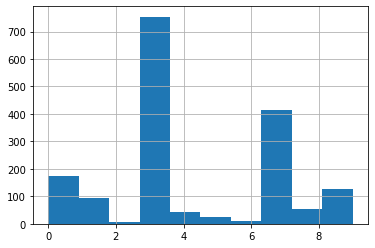

In [57]:
data["type_car"].hist()

# 2. Исследование задачи

Разделим выборку на train, valid и test.

In [62]:
features = data.drop(['type_car'], axis=1)
target = data['type_car']
features_train, features_valid_test, target_train, target_valid_test = tts(features, target,
                                                                           test_size=0.2, random_state=12345,
                                                                            )
features_valid, features_test, target_valid, target_test = tts(features_valid_test, target_valid_test,
                                                               test_size=0.5, random_state=12345,
                                                            )

Признаки для логистической регрессии:

In [64]:
features_train_lr = features_train.drop(["brand"], axis=1)
features_valid_lr = features_valid.drop(["brand"], axis=1)
features_test_lr = features_test.drop(["brand"], axis=1)

Признаки для Деревянных моделей:

In [65]:
features_train_tree = features_train
features_valid_tree = features_valid
features_test_tree = features_test

In [66]:
features_train_lr.head()

,seats,doors,engine_type,engine_power,engine_torque,gearbox_type,drive_type,time_tohndrd,maximum_speed,fuel_consumption,ground_clearance,wheelbase,tunk_capacity,maximum_trunk_capacity,fuel_tank_volume,car_weight,car_length,car_width,car_heigth,engine_volume,speed_transmission_num
221,4,2,0,410,550,2,0,4.4,250,9.7,123,2693,390,390,52,1625,4461,1854,1410,2979,6
1664,5,5,2,190,400,0,2,7.9,210,5.1,211,2702,479,1670,54,1698,4425,1863,1652,1969,8
198,5,5,0,340,450,0,2,5.2,250,8.9,138,3070,610,1800,68,1910,5091,1902,1538,2998,8
775,5,6,0,400,550,0,2,6.0,191,3.3,225,2587,297,1563,90,2351,4323,1998,1974,2995,8
526,5,5,2,300,700,0,2,6.2,241,6.2,161,2874,508,1598,66,1884,4731,2070,1652,2993,8


Масштабируем количественные признаки для Логистической регрессии:

In [68]:
numeric = ['engine_power', 'engine_torque', 'time_tohndrd', 'maximum_speed', 'fuel_consumption',
            'ground_clearance', 'wheelbase', 'tunk_capacity', 'maximum_trunk_capacity', "fuel_tank_volume", 
            "car_weight", "car_length", "car_width", "car_heigth", "engine_volume", "speed_transmission_num"]

In [69]:
scaler = StandardScaler()
scaler.fit(features_train_lr[numeric])
features_train_lr[numeric] = scaler.transform(features_train_lr[numeric])
features_valid_lr[numeric] = scaler.transform(features_valid_lr[numeric])
features_test_lr[numeric] = scaler.transform(features_test_lr[numeric])

Обучим модели. Сначала Логистическую регрессию, потом Дерево решений и Случапйный лес: 

Логистическая регрессия:

In [70]:
model_lr = lr(random_state=12345, solver='lbfgs')
model_lr.fit(features_train_lr, target_train)
predicted_valid_lr = model_lr.predict(features_valid_lr)

/home/moxi/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
print(classification_report(target_valid, predicted_valid_lr))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         0
           3       0.96      0.99      0.97        78
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         1
           7       0.97      0.95      0.96        41
           8       0.60      0.60      0.60         5
           9       0.87      0.87      0.87        15

    accuracy                           0.95       170
   macro avg       0.82      0.78      0.80       170
weighted avg       0.95      0.95      0.95       170



/home/moxi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/moxi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/moxi/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print(f1_score(target_valid, predicted_valid_lr, average="micro"))

0.9470588235294117


# 3. Итоги

Были проанализированы и подготовлены данные комплектации автомобилей, показана f1 мера на логистической регрессии, которая вполне удовлетворяет запросу.

На самом деле, мне не очень хватило времени для того, чтобы закончить все, я бы еще потестировал
на деревянных алгоритмах и поработал бы над балансом данных, потому что разброс довольно большой. 

Код временами может быть ужасным, он мне не нравится. Я не знаю, как правильно писать код в джупутерах, 
потому что на работе и на своих проектах я обычно пишу его в виме, так что могут быть проблемы с оформлением.
Аналитики вообще пишут очень странный код, я пошарил гитхаб, у большинства даже функций в коде нет, а я пытался
повторять за найденными проектами. 